In [12]:
include("../EuclidElements.jl")

"Euclid's Elements! :D"

# Book 1

## Proposition 11

To draw a straight line at right angles to a given straight line from a given point on it.

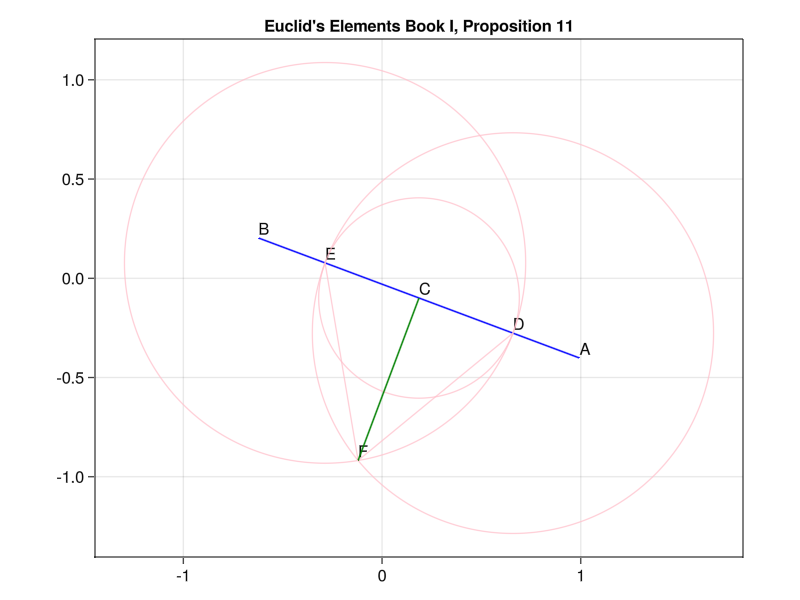

In [2]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 11")

# Let AB be the given straight line, and C the given point on it.
A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
#           ASIDE: we'll choose C in the middle
C = Point2f0((A + B) ./ 2)
lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")

# ASIDE : some useful info about AC and AB
AC = C-A
AC_norm = norm(AC)
AC_θ = vector_angle(A, C)

# Thus it is required to draw from the point C a straight line at right angles to the straight line AB.

# Let a point D be taken at random on AC;
AD_norm = rand(Uniform(0f0, AC_norm))
D = Point2f0(AD_norm*[cos(AC_θ), sin(AC_θ)] + A)
text!(D, text="D")

# let CE be made equal to CD; [I.3]
CD_norm = AC_norm - AD_norm
E = Point2f0(CD_norm*[cos(AC_θ), sin(AC_θ)] + C)
DE = whole_circle(C, AC_norm-AD_norm, vector_angle(C, D), cursorcolor=:red, color=:pink, linewidth=1f0)
fill_circle(DE)
text!(E, text="E")

# on DE let the equilateral triangle FDE be constructed. [I.1]
DEF = equilateral_triangle(D, E, cursorcolor=:red, color=:pink)
fill_equilateral(DEF)
F = Point(DEF)
text!(F, text="F")

# and let FC be joined;
lines!([F,C], color=:green)

# I say that the straight line FC has been drawn at right angles to 
#   the given straight line AB from C the given point on it.
# For, since DC is equal to CE, and CF is common,
# the two sides DC, CF are equal to the two sides EC, CF respectively;
# and the base DF is equal to the base FE;
# therefore the angle DCF is equal to the angle ECF; [I.8]
# and they are adjacent angles.

# But, when a straight line set up on a straight line makes the adjacent angles
#   equal to one another, each of the equal angles is right; [Def. 10]
# therefore each of the angles DCF, FCE is right.

# Therefore the straight line CF has been drawn at right angles to the given
#   straight line AB from the given point C on it.

#QEF

#Draw and show the chart :)
current_figure()

### Animation

In [5]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 11")
xlims!(ax, -1.5,2)
ylims!(ax, -1.35,1.25)

# Let AB be the given straight line, and C the given point on it.
#           ASIDE: uncomment to choose unique lines
#A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
#B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
#           ASIDE: we'll choose C in the middle
#C = Point2f0((A + B) ./ 2)
lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")

# Thus it is required to draw from the point C a straight line at right angles to the straight line AB.

# Let a point D be taken at random on AC;
#AD_norm = rand(Uniform(0f0, AC_norm))
#D = Point2f0(AD_norm*[cos(AC_θ), sin(AC_θ)] + A)
D_opac = Observable(0f0)
text!(D, text="D", color=@lift(RGBA(0,0,0,$D_opac)))

# let CE be made equal to CD; [I.3]
#CD_norm = AC_norm - AD_norm
#E = Point2f0(CD_norm*[cos(AC_θ), sin(AC_θ)] + C)
DE = whole_circle(C, AC_norm-AD_norm, vector_angle(C, D), cursorcolor=:red, color=:pink, linewidth=3f0, cursorwidth=2f0)
E_opac = Observable(0f0)
text!(E, text="E", color=@lift(RGBA(0,0,0,$E_opac)))

# on DE let the equilateral triangle FDE be constructed. [I.1]
DEF = equilateral_triangle(D, E, cursorcolor=:red, color=:pink, linewidth=3f0, cursorlw=0.005f0, circlecursorlw=2f0)
F = Point(DEF)
F_opac = Observable(0f0)
text!(F, text="F", color=@lift(RGBA(0,0,0,$F_opac)))

# and let FC be joined;
FC = straight_line(F, C, color=:green, linewidth=2f0, cursorwidth=0.005f0)

# I say that the straight line FC has been drawn at right angles to 
#   the given straight line AB from C the given point on it.
# For, since DC is equal to CE, and CF is common,
# the two sides DC, CF are equal to the two sides EC, CF respectively;
# and the base DF is equal to the base FE;
# therefore the angle DCF is equal to the angle ECF; [I.8]
# and they are adjacent angles.

# But, when a straight line set up on a straight line makes the adjacent angles
#   equal to one another, each of the equal angles is right; [Def. 10]
# therefore each of the angles DCF, FCE is right.

# Therefore the straight line CF has been drawn at right angles to the given
#   straight line AB from the given point C on it.

#QEF


# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 3.5f0π, step=3.5f0π/(d_s*framerate))

record(f, "gifs/Euclid-I-11.01.gif", timestamps; framerate=framerate) do t
    # animate the point letters
    if t <= 0.5π
        D_opac[] = 0f0
        E_opac[] = 0f0
        F_opac[] = 0f0
    elseif t > 0.5f0π && t <= 0.75f0π
        D_opac[] = (t-0.5f0π)/0.25f0π
        E_opac[] = 0f0
        F_opac[] = 0f0
    elseif t > 0.75f0π && t <= 1.25π
        D_opac[] = 1f0
        E_opac[] = 0f0
        F_opac[] = 0f0
    elseif t > 1.25π && t <= 1.5π
        D_opac[] = 1f0
        E_opac[] = (t-1.25π)/0.25π
        F_opac[] = 0f0
    elseif t > 1.5π && t <= 2π
        D_opac[] = 1f0
        E_opac[] = 1f0
        F_opac[] = 0f0
    elseif t > 2π && t <= 2.25π
        D_opac[] = 1f0
        E_opac[] = 1f0
        F_opac[] = (t-2π)/0.25π
    elseif t > 2.25π
        D_opac[] = 1f0
        E_opac[] = 1f0
        F_opac[] = 1f0
    end

    # animate the circle for D and E
    animate_circle(DE, 0.75π, 1.25π, t, fade_start=1.75π, fade_end=2.25π)

    # animate finding F
    animate_equilateral(DEF, 1.5π, 2π, t, fade_start=2.25π, fade_end=2.75π)

    # animate drawing FC
    animate_line(FC, 2.25π, 2.75π, t)
end;

![animation](gifs/Euclid-I-11.01.gif)

#### Using Reusable Animation Code

In [13]:
#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 11")
xlims!(ax, -1.5,2)
ylims!(ax, -1.35,1.25)

# Let AB be the given finite straight line
#   Uncomment if new points are desired, or will use the same as above:
#A = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
#B = Point2f0(rand(Uniform(-1f0, 1f0)), rand(Uniform(-1f0, 1f0)))
#           ASIDE: we'll choose C in the middle
#C = Point2f0((A + B) ./ 2)
lines!([A,B], color=:blue)
text!(A, text="A")
text!(B, text="B")
text!(C, text="C")

#Draw the lines and get the endpoints of C, F
CF = perpendicular(A, B, C, color=:pink, linewidth=3f0, cursorwidth=0.005f0)
F = Point(CF)
if norm(F-C) < 0.5f0
    # just avoiding a very small line...
    F = continue_line(C, F, 0.5f0)
end
F_opac = Observable(0f0)
text!(F, text="F", color=@lift(RGBA(0,1,0,$F_opac)))

# Draw line CF
CF_line = straight_line(C, F, color=:green, linewidth=2f0, cursorwidth=0.005f0)


# Draw the animation!
framerate = 24
d_s = 24
timestamps = range(0, 5π, step=5π/(d_s*framerate))

record(f, "gifs/Euclid-I-11.02.gif", timestamps; framerate=framerate) do t
    # animate the perpendicular background
    animate_perpendicular(CF, 0.5π, 2.25π, t, fade_start=2.5f0π, fade_end=3f0π)
    if t > 2.25π && t < 2.5π
        F_opac[] = (t-2.25π)/0.25π
    elseif t >= 2.5π
        F_opac[] = 1f0
    end

    #Animate CF
    animate_line(CF_line, 2.25f0π, 2.75f0π, t)
end;

![animation](gifs/Euclid-I-11.02.gif)